<a href="https://colab.research.google.com/github/Lucas-GomezP/Proyecto2-BigData-UPSO/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Se abre el el dataset
path = '/content/drive/MyDrive/Materias/Big Data/practico 2/' #ruta de ubicación del archivo
filename = 'Canciones_Spotify.csv' #nombre del archivo
fullname = path+filename #ruta + nombre del archivo
df = pd.read_csv(fullname) #apertura del dataset

del filename, fullname

In [4]:
#dataset original
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [5]:
#se crea una copia del dataset
atributos_spotify = df.copy()

#se eliminan los atributos que no se van a utilizar
#"Unnamed: 0": columna de índice o identificación que no aporta información útil para el modelo
#"song_title" y "artist": contienen información de texto. Los modelos SVM trabajan mejor con características numéricas.
#"time_signature": a menos haya una razón específica para incluir esta característica, puede no ser relevante para clasificar las preferencias del usuario.
#"duration_ms": la duracion de una cancion realmente no determina si esta le va a gustar o no al usuario final
#"liveness": se quita si es en vivo o no, ya que generalmente a una persona que le gusta una cancion no le deja de gustar porque este en vivo o no
#"loudness": se retira ya que realmente no hay gran distincion entre un valor alto o bajo contra los me gusta o los no me gusta
#"mode": a menos haya una razón específica para incluir esta característica, puede no ser relevante para clasificar las preferencias del usuario.
#"key": a menos haya una razón específica para incluir esta característica, puede no ser relevante para clasificar las preferencias del usuario.
#"target": columna que actúa como etiqueta, se la debe separar y tratarla como el objetivo de clasificación.

columns_to_drop = ["Unnamed: 0", "song_title", "artist", "time_signature","duration_ms","liveness","loudness","mode","key"]
atributos_spotify = atributos_spotify.drop(columns=columns_to_drop)

In [6]:
#visualizacion del nuevo dataset con columnas a utilizar por el modelo
atributos_spotify

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,target
0,0.01020,0.833,0.434,0.021900,0.4310,150.062,0.286,1
1,0.19900,0.743,0.359,0.006110,0.0794,160.083,0.588,1
2,0.03440,0.838,0.412,0.000234,0.2890,75.044,0.173,1
3,0.60400,0.494,0.338,0.510000,0.0261,86.468,0.230,1
4,0.18000,0.678,0.561,0.512000,0.0694,174.004,0.904,1
...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,0.932,0.002690,0.3330,74.976,0.211,0
2013,0.08770,0.894,0.892,0.001670,0.1310,110.041,0.867,0
2014,0.00857,0.637,0.935,0.003990,0.1070,150.082,0.470,0
2015,0.00164,0.557,0.992,0.677000,0.1330,150.011,0.623,0


In [7]:
#Remoción de valores nulos
atributos_spotify.dropna(inplace=True) #eliminación de nan

In [8]:
#Distribución del tipo de informacion
atributos_spotify['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [9]:
atributos_spotify.nunique() #muestra cuantos diferentes

acousticness        1394
danceability         632
energy               719
instrumentalness    1107
speechiness          792
tempo               1919
valence              853
target                 2
dtype: int64

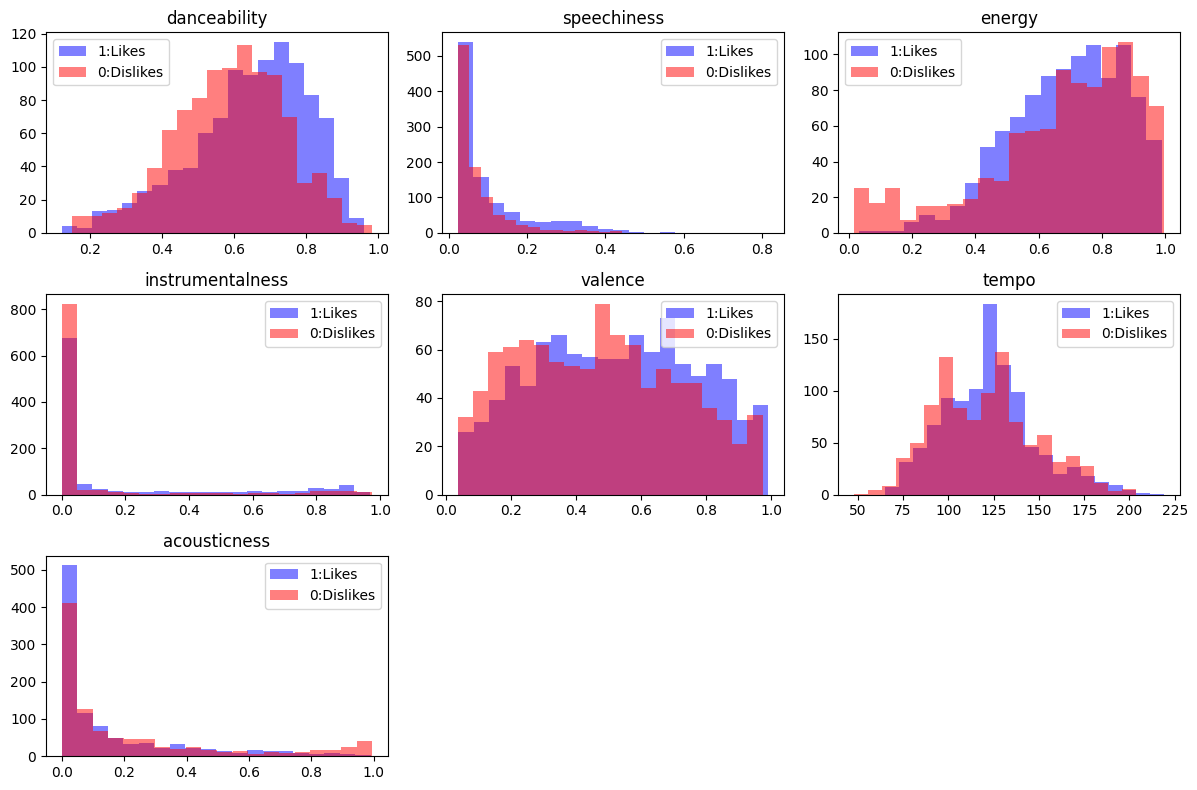

In [10]:
#Se arman histogramas para conocer la cantidad y distribucion de de cada valor de caracteristica
# Seleccionar las columnas relevantes y dividir el dataset en "likes" (target=1) y "dislikes" (target=0)

features = ["danceability", "speechiness", "energy", "instrumentalness", "valence", "tempo","acousticness"]

likes_atributos_spotify = atributos_spotify[atributos_spotify['target'] == 1]
dislikes_atributos_spotify = atributos_spotify[atributos_spotify['target'] == 0]

# Crear un histograma para cada característica
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)
    plt.hist(likes_atributos_spotify[feature], bins=20, alpha=0.5, label='1:Likes', color='blue')
    plt.hist(dislikes_atributos_spotify[feature], bins=20, alpha=0.5, label='0:Dislikes', color='red')
    plt.title(feature)
    plt.legend()

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar los histogramas
plt.show()

Se utilizaron histogramas para resumir la distribución de las características de los datos, de esta manera se tuvo una visión general de cómo se distribuyen los valores

In [11]:
# Separar canciones en X y etiquetas en y
X = atributos_spotify.drop(columns=['target'])
y = atributos_spotify['target']

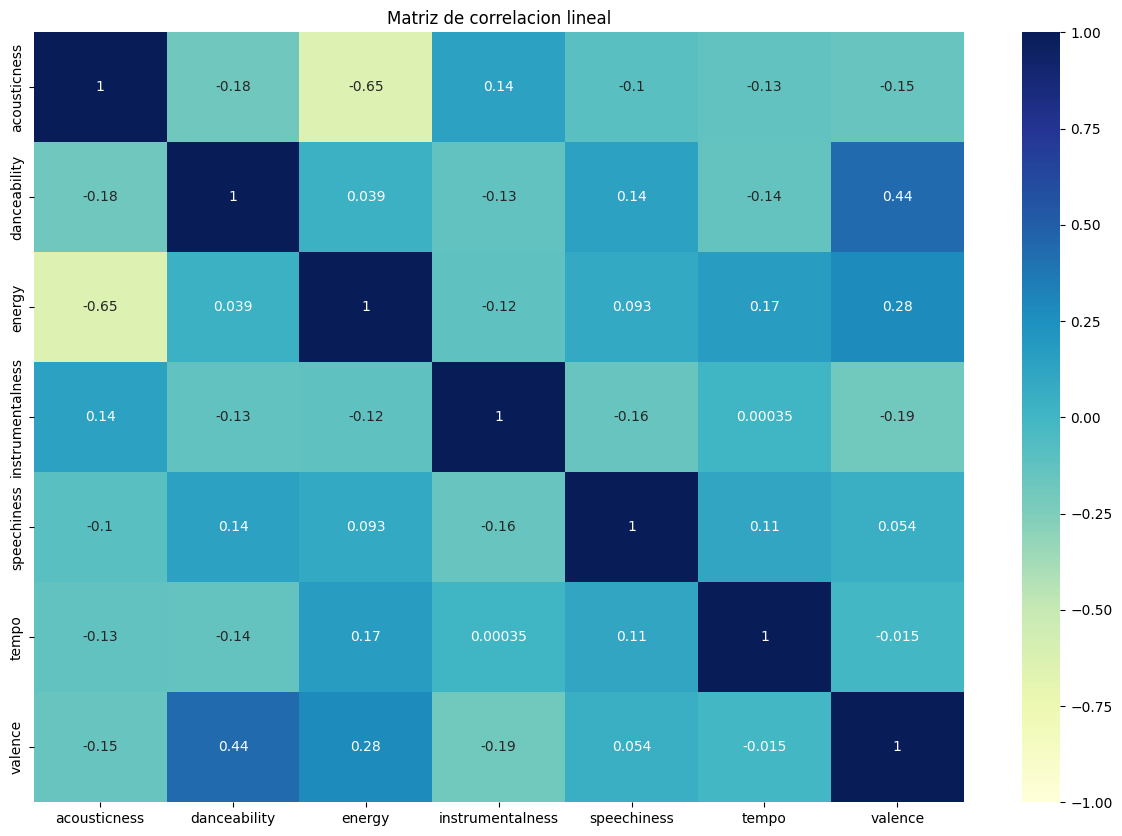

In [12]:
# Gráfico de Matriz de Correlacion Lineal
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Matriz de correlacion lineal')
plt.show()

Aunque la matriz de correlacion no implica causalidad, ayuda a elegir características relevantes para la toma de decisiones y de esa manera no introducir "ruido" en un modelo.

In [13]:
#Importar las bibliotecas que necesitamos usar los modelos
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Arbol de decision
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [14]:
#Se dividen los datos en 70 - 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para evitar la repeticion de codigo entre la creacion de gridSearch y randomSearch, ademas del calculo de los distintos scores y la matriz de confusion, se decidio por realizar una funcion general en el que se pasan los parametros de los distintos modelos para realizar todas estas acciones.

De esta manera agilizamos la prueba de cada modelo solamente cambiando los parametros de cada uno y despreocupandonos del resto del codigo.

In [15]:
def best_clasificator(model,X,y,test_size=0.2,params={}):
  # Definimos el test y train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Hacemos el grid search en base a los parametros
  grid_search = GridSearchCV(model(), params, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  best_grid_params = grid_search.best_params_

  # Hacemos el random search en base a los parametros
  random_search = RandomizedSearchCV(model(), param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
  random_search.fit(X_train, y_train)
  best_random_params = random_search.best_params_

  # Entrenamos ambos modelos
  grid = model(**best_grid_params)
  grid.fit(X_train, y_train)
  y_pred_grid = grid.predict(X_test)

  random = model(**best_random_params)
  random.fit(X_train, y_train)
  y_pred_random = random.predict(X_test)

  # Hacemos las metricas para cada modelo y sacamos un promedio de cada una
  accuracy_grid = accuracy_score(y_test, y_pred_grid)
  precision_grid = precision_score(y_test, y_pred_grid)
  recall_grid = recall_score(y_test, y_pred_grid)
  f1_grid = f1_score(y_test, y_pred_grid)
  mean_scores_grid = (accuracy_grid + precision_grid + recall_grid + f1_grid) / 4

  accuracy_random = accuracy_score(y_test, y_pred_random)
  precision_random = precision_score(y_test, y_pred_random)
  recall_random = recall_score(y_test, y_pred_random)
  f1_random = f1_score(y_test, y_pred_random)
  mean_scores_random = (accuracy_random + precision_random + recall_random + f1_random) / 4


  if mean_scores_grid > mean_scores_random:
    # Realizamos la validacion cruzada
    print('Cross Validation:')
    scores = cross_val_score(grid, X, y, cv=5)
    for fold, score in enumerate(scores, start=1):
      print(f"Fold {fold}: {score}")
    mean_score = scores.mean()
    print("Mean Score Cross Validation:", mean_score)
    print()
    print('Scores:')
    print("Accuracy:", accuracy_grid)
    print("Precision:", precision_grid)
    print("Recall:", recall_grid)
    print("F1:", f1_grid)

    c = confusion_matrix(y_test, y_pred_grid)
    plt.figure(figsize=(7,5))
    sns.heatmap(c, annot=True, fmt='g', xticklabels=(0,1), yticklabels=(0,1))
    plt.xlabel('Etiqueta predicha')
    plt.ylabel('Etiqueta verdadera')
    plt.title('Matriz de Confusión')
    plt.show()
    return grid, y_pred_grid, {'accuracy': accuracy_grid,'precision': precision_grid,'recall': recall_grid,'f1': f1_grid}, best_grid_params
  else:
    # Realizamos la validacion cruzada
    print('Cross Validation:')
    scores = cross_val_score(random, X, y, cv=5)
    for fold, score in enumerate(scores, start=1):
      print(f"Fold {fold}: {score}")
    mean_score = scores.mean()
    print("Mean Score Cross Validation:", mean_score)
    print()
    print('Scores:')
    print("Accuracy:", accuracy_random)
    print("Precision:", precision_random)
    print("Recall:", recall_random)
    print("F1:", f1_random)
    c = confusion_matrix(y_test, y_pred_random)
    plt.figure(figsize=(7,5))
    sns.heatmap(c, annot=True, fmt='g', xticklabels=(0,1), yticklabels=(0,1))
    plt.xlabel('Etiqueta predicha')
    plt.ylabel('Etiqueta verdadera')
    plt.title('Matriz de Confusión')
    plt.show()
    return random, y_pred_random, {'accuracy': accuracy_random,'precision': precision_random,'recall': recall_random,'f1': f1_random}, best_random_params

# Knn

Cross Validation:
Fold 1: 0.5915841584158416
Fold 2: 0.5297029702970297
Fold 3: 0.5285359801488834
Fold 4: 0.6129032258064516
Fold 5: 0.6029776674937966
Mean Score Cross Validation: 0.5731408004324006

Scores:
Accuracy: 0.594059405940594
Precision: 0.6103896103896104
Recall: 0.47474747474747475
F1: 0.5340909090909091


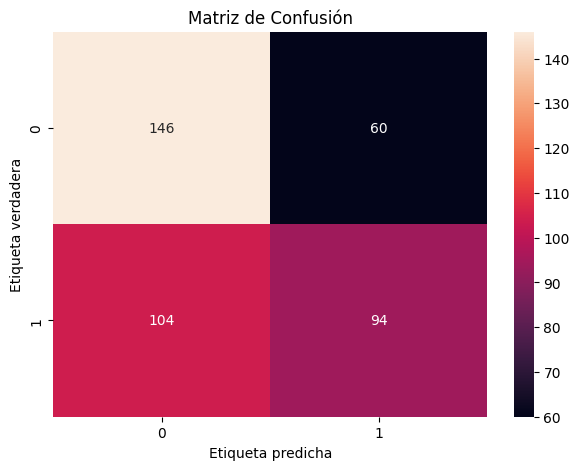

In [16]:
#Parámetros del modelo KNN
params_knn = {
  'n_neighbors': range(1,15),
  'weights': ['uniform', 'distance'],
  'p': [1, 2],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'leaf_size': range(15,40,5)
}

best_knn, y_pred_knn, scores_knn, params_best_knn = best_clasificator(KNeighborsClassifier,X,y,0.2,params_knn)

# SVM

Cross Validation:
Fold 1: 0.5792079207920792
Fold 2: 0.5915841584158416
Fold 3: 0.48635235732009924
Fold 4: 0.6327543424317618
Fold 5: 0.630272952853598
Mean Score Cross Validation: 0.5840343463626759

Scores:
Accuracy: 0.6262376237623762
Precision: 0.6441717791411042
Recall: 0.5303030303030303
F1: 0.5817174515235457


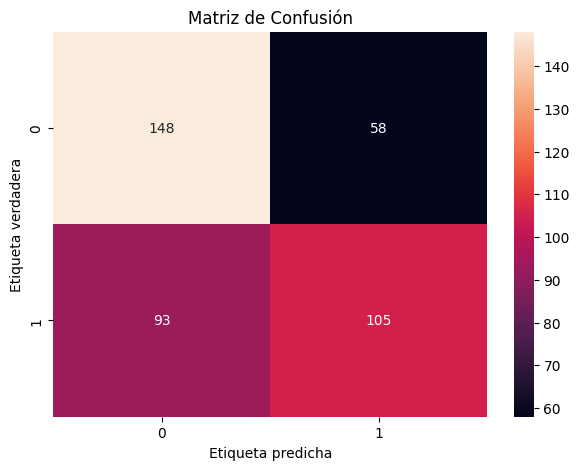

In [17]:
#Parámetros para el modelo SVM
param_svm = {
  'kernel': ['linear', 'rbf'],
  'C': [0.1, 0.5, 1, 5, 10],
  'gamma': [0.1, 0.5, 1, 5, 10]
  }

best_svm, y_pred_svm, scores_svm, params_best_svm = best_clasificator(SVC,X,y,0.2,param_svm)

# Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross Validation:
Fold 1: 0.49504950495049505
Fold 2: 0.6262376237623762
Fold 3: 0.48635235732009924
Fold 4: 0.6104218362282878
Fold 5: 0.5707196029776674
Mean Score Cross Validation: 0.5577561850477851

Scores:
Accuracy: 0.6386138613861386
Precision: 0.634020618556701
Recall: 0.6212121212121212
F1: 0.6275510204081634


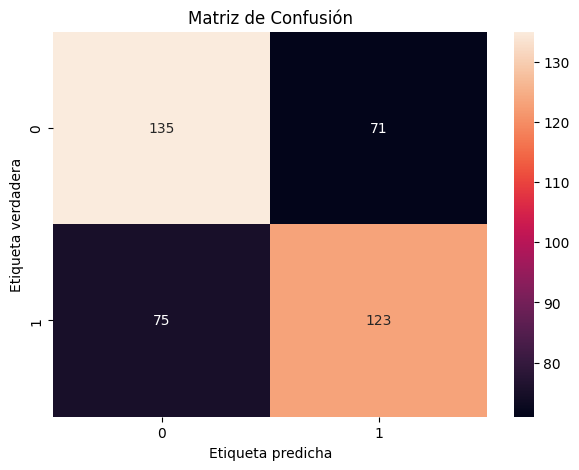

In [18]:
#Parámetros del modelo Naive Bayes
param_naive_bayes = {
  'priors':[None]
  }

best_naive_bayes, y_pred_naive_bayes, scores_naive_bayes, params_best_naive_bayes = best_clasificator(GaussianNB,X,y,0.2,param_naive_bayes)

# Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross Validation:
Fold 1: 0.6658415841584159
Fold 2: 0.6138613861386139
Fold 3: 0.5533498759305211
Fold 4: 0.6650124069478908
Fold 5: 0.6923076923076923
Mean Score Cross Validation: 0.6380745890966267

Scores:
Accuracy: 0.650990099009901
Precision: 0.6432160804020101
Recall: 0.6464646464646465
F1: 0.6448362720403024


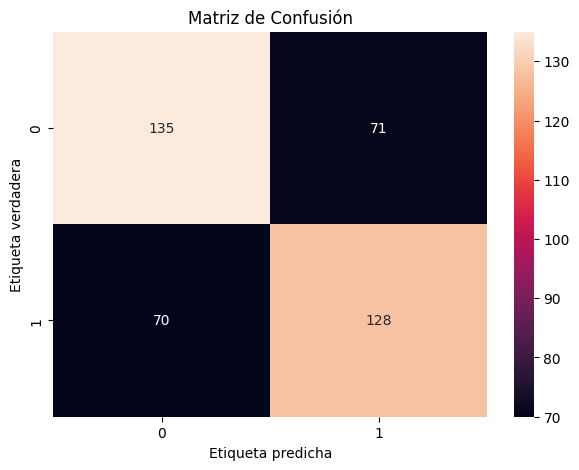

In [19]:
#Parámetros para la implementación del árbol de decision
param_decision_tree = {
  'max_depth':range(20,100,10)
  }

best_decision_tree, y_pred_decision_tree, scores_decision_tree, params_best_decision_tree = best_clasificator(DecisionTreeClassifier,X,y,0.2,param_decision_tree)

# Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross Validation:
Fold 1: 0.7153465346534653
Fold 2: 0.655940594059406
Fold 3: 0.5607940446650124
Fold 4: 0.7518610421836228
Fold 5: 0.7121588089330024
Mean Score Cross Validation: 0.6792202048989018

Scores:
Accuracy: 0.7301980198019802
Precision: 0.714975845410628
Recall: 0.7474747474747475
F1: 0.7308641975308642


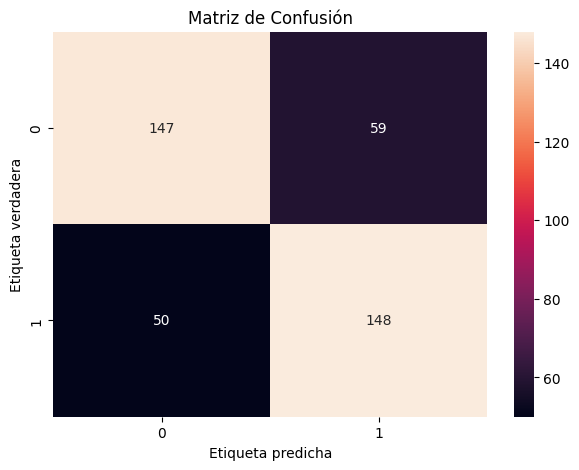

In [20]:
param_random_forest = {
  'n_estimators':range(20,100,10)
  }

best_random_forest, y_pred_random_forest, scores_random_forest, params_best_random_forest = best_clasificator(RandomForestClassifier,X,y,0.2,param_random_forest)

# Ensamble
Se tomo la decision final de utilziar 5 modelelos de clasificacion para reducir la posibilidad de empate a la hora del ensamble y votos en el mismo.

KNN
Configuracion: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Scores: {'accuracy': 0.594059405940594, 'precision': 0.6103896103896104, 'recall': 0.47474747474747475, 'f1': 0.5340909090909091}
SVM
Configuracion: {'kernel': 'linear', 'gamma': 10, 'C': 10}
Scores: {'accuracy': 0.6262376237623762, 'precision': 0.6441717791411042, 'recall': 0.5303030303030303, 'f1': 0.5817174515235457}
Naive Bayes
Configuracion: {'priors': None}
Scores: {'accuracy': 0.6386138613861386, 'precision': 0.634020618556701, 'recall': 0.6212121212121212, 'f1': 0.6275510204081634}
Decision Tree
Configuracion: {'max_depth': 90}
Scores: {'accuracy': 0.650990099009901, 'precision': 0.6432160804020101, 'recall': 0.6464646464646465, 'f1': 0.6448362720403024}
Random Forest
Configuracion: {'n_estimators': 70}
Scores: {'accuracy': 0.7301980198019802, 'precision': 0.714975845410628, 'recall': 0.7474747474747475, 'f1': 0.7308641975308642}


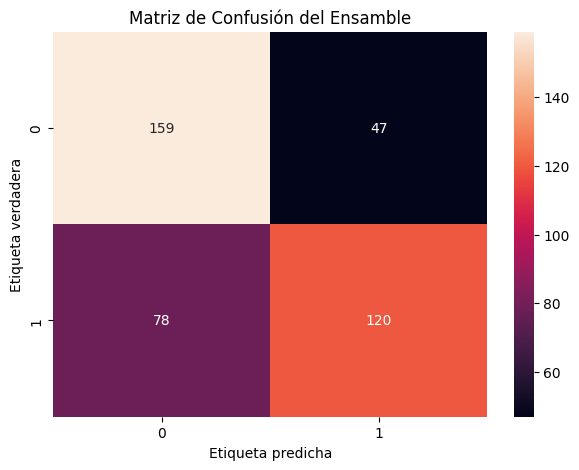

In [21]:
# Obtenemos la prediccion de cada uno de los modelos con mejor configuracion obtenida
knn_predictions = best_knn.predict(X_test)
svm_predictions = best_svm.predict(X_test)
naive_bayes_predictions = best_naive_bayes.predict(X_test)
decision_tree_predictions = best_decision_tree.predict(X_test)
random_forest_predictions = best_random_forest.predict(X_test)

# Almacenamos la prpediccion final del ensamble
final_predictions = []

# Iteramos sobre los modelos y utilziamos un sistema de votos para obtener el resultado final
for k, s, n, dt, rf in zip(knn_predictions, svm_predictions, naive_bayes_predictions, decision_tree_predictions, random_forest_predictions):
  votes = {0: 0, 1: 0, 2: 0}

  votes[k] += 1
  votes[s] += 1
  votes[n] += 1
  votes[dt] += 1
  votes[rf] += 1

  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

print('KNN')
print('Configuracion:', params_best_knn)
print('Scores:',scores_knn)
print('SVM')
print('Configuracion:', params_best_svm)
print('Scores:',scores_svm)
print('Naive Bayes')
print('Configuracion:', params_best_naive_bayes)
print('Scores:',scores_naive_bayes)
print('Decision Tree')
print('Configuracion:', params_best_decision_tree)
print('Scores:',scores_decision_tree)
print('Random Forest')
print('Configuracion:', params_best_random_forest)
print('Scores:',scores_random_forest)

# Creamos la matriz de confusion
c = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=(0,1), yticklabels=(0,1))
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()

# Conclusion

Nuestro estudio mostró que el algoritmo de aprendizaje automático de mejor rendimiento para la predicción de canciones elegibles por el usuario fue Random Forest, logrando una precisión mayor al 70%. Mientras que el resto de los modelos mostró una precisión más baja. Por lo que para esta muestra resulta factible la elección de algoritmo Random Forest para realizar predicciones.